<a href="https://colab.research.google.com/github/BlancaCC/Computer-vision/blob/p1/practica_0/Pr%C3%A1ctica_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 0 
Blanca Cano Camarero DGIIM

Toda esta práctica será realizada con opencv de python luego será necesario importar la biblioteca respectiva. 

In [2]:
import cv2
import numpy as np

# Rutas posibles
colab =  '/content/drive/MyDrive/Visión por computador/práctica 0/images/'
local = './images/'
ruta_actual = local

if(ruta_actual == colab): 
    from google.colab import drive
    drive.mount('/content/drive')
    from google.colab.patches import cv2_imshow # for image display

# Path de las imágenes 
path_dave = ruta_actual +'dave.jpg'
path_messi = ruta_actual + 'messi.jpg'
path_orapple = ruta_actual +'orapple.jpg'
path_logo = ruta_actual +'logoOpenCV.jpg'

todas_imagenes = [path_dave, path_logo, path_messi, path_orapple]



## **Ejercicio** 1
Escribir una función que lea el fichero de una imagen y permita mostrarla
tanto en grises como en color (im=leeimagen(filename, flagColor)).
flagColor es la variable que determina si la imagen se muestra en escala
de grises o en color.

### Explicación de la solución  
Usaremos la función propia de cv2 imread. 
`imread(path, flag)`, que muestra el path de la imagen y flag el método en que la variable será leída.  

Los flags que nos van a ser útiles son:  
- `cv2.IMREAD_COLOR` para color 
- `cv2.IMREAD_GRAYSCALE` Modo de escala de grises. 

Recursos utilizados (fecha de consulta 24/09/21): 

[Geekforgeek](https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/)


In [3]:
def leeImagen(filename, flagColor):
  '''
  @param filename: nombre de la foto 
  @para flagColor: boolean escala de grises o color
  '''
  return cv2.imread(filename, flagColor)

## Ejemplos de uso de la función 
#from google.colab.patches import cv2_imshow # Para mostrar imágenes
## Flags
flagColor = cv2.IMREAD_ANYCOLOR
flagGrey = cv2.IMREAD_GRAYSCALE

#orapple 
img_orapple_color = leeImagen(path_orapple, flagColor) 
#cv2_imshow(img_orapple_color) # Ejemplo para comprobar que funciona
img_orapple_gris = leeImagen(path_orapple, flagGrey)
#cv2_imshow(img_orapple_gris)
# messi
img_messi_color = leeImagen(path_messi, flagColor) # como vemos si la imagen está en blanco y negro no le afecta
#cv2_imshow(img_messi_color)
img_messi_gris = leeImagen(path_messi, flagGrey)
#cv2_imshow(img_messi_gris)

## Crearemos imagen del resto para el resto de path
imagenes_color = list(map( lambda img : leeImagen( img, flagColor), todas_imagenes))
imagenes_gris = list(map( lambda img : leeImagen( img, flagGrey), todas_imagenes))


## Ejercicio 2

Escribir una función que permita visualizar una matriz de números reales
cualquiera/arbitraria, tanto monobanda como tribanda (pintaI(im)). Para
ello se deberá escalar el rango de cada banda al intervalo [0,1] sin pérdida
de información.

### Explicación    
Para conseguir el objetivo tendremos que resolver dos problemas principalmente: 
1. Conseguir un reeescalado. 
2. Mostrarlo. 

#### Soluciones 

1. Para conseguir el reescalado aplicaremos un homeomorfismo del intervalo $[a,b]$ a $[0,1]$. 

Como no se nos ha proporcionado información adicional sobre el ejercicio supondremos que $a$ es el valor mínimo de las entradas de la matriz y $b$ el valor máximo. 

Distinguimos las siguientes casuísticas: 

- Para $a$ = $b$,  puesto que no nos indica nada, tomamos el criterio arbitrario de poner a cero todas las entradas.

- En caso de que sean diferentes: 
Para todo $p \in \mathbb R^d$ con $d \in \{1,3\}$ un pixel de la matriz (1 si es gris, 3 si es de colores). El homeomorfismo de reescalado $R$ viene dado por: 

$$R(p) = \frac{p-a}{b-a}$$

2. Para la muestra. 
Vamos a mostrarlo con la biblioteca de mathplotlib. 
Cabe destacar que para mathplotlib es necesario invertir los canales de colores. 

Otra opción (implementada en pintaI2)
la función `cv2.imshow` no es posible usarla en colab, luego hemos usado una alternativa proporcionada por google 
Hemos usado este ejemplo
[Link ejemplo colab](
https://colab.researchb.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb#scrollTo=6dy-iP-VTib)

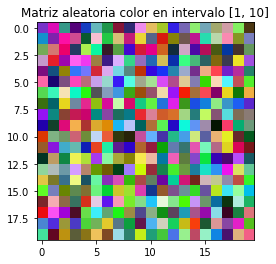

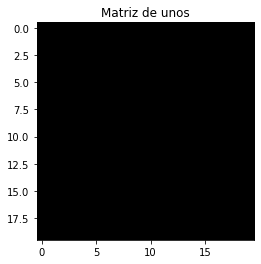

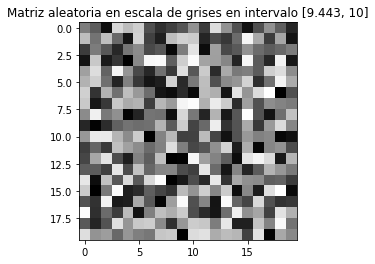

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def Reescalado (img: np.ndarray) -> np.ndarray:
    """Homeomorfismo R (ver explicación)"""
    minimo = img.min()
    maximo = img.max() 
    matrizReescada = None
    
    if(minimo == maximo):
        matrizReescalada = 0*img
    else:
        matrizReescalada = (img - minimo)/(maximo - minimo)  
        
    return matrizReescalada

def pintaI(img, titulo=""):
    '''Visualiza una matriz de números reales cualquiera'''
    plt.title(titulo)
    # si la imagen es tribanda, tenemos que invertir los canales B y R
    # si es en blanco y negro, tenemos que decirle a matplotlib que es monobanda
    imagen = Reescalado(img)
    if imagen.ndim == 3 and imagen.shape[2] >= 3:
        plt.imshow(imagen[:,:,::-1])
    else:
        plt.imshow(imagen, cmap='gray')
    plt.show()


def pintaI2(img: np.ndarray, titulo = ''):
    """Visualiza una matriz de números reales cualquiera
     - im: Imagen a visualizar"""
    print(titulo)
    cv2_imshow(Reescalado(img))

## Ejemplo colores la matriz aleatoria 
def HomeomorfismoMatriz(a:float, b:float, matriz: np.ndarray )-> np.ndarray:
    ''' De  [0,1] a [a,b] '''
    return matriz* (b-a) +a

#######
# Definición de intervalo de rangos
a = 1; b=10; 
c=9.443; d=10

# Generamos matrices
random_img_color = HomeomorfismoMatriz(a,b,np.random.rand(20, 20, 3))
matriz_unos= np.ones((20, 20, 3))
random_img_gray = HomeomorfismoMatriz(c,d,np.random.rand(20,20))
# Pintamos las matrices
pintaI(random_img_color, f'Matriz aleatoria color en intervalo [{a}, {b}]')
pintaI(matriz_unos, 'Matriz de unos')
pintaI(random_img_gray, f'Matriz aleatoria en escala de grises en intervalo [{c}, {d}]')

if(ruta_actual == colab): 
    pintaI2(random_img_color, f'Matriz aleatoria color en intervalo [{a}, {b}] con pinta 2')

## Ejercicio 3
Escribir una función que visualice varias imágenes distintas a la vez
(concatenando las imágenes en una última imagen final 1 ): pintaMI(vim).
(vim será una secuencia de imágenes) ¿Qué pasa si las imágenes no son
todas del mismo tipo?

### Descripción 

Pretendemos visualizar varias imágenes concatenadas. 
La descripción general del algoritmo es:
1. Criterio para manejar las que estén en color y las que no.
2. Ajustar tamaño
3. Concatenar. 

La soluciones aportadas:
1. Se pasan todas a color gracias a la función `cv2.cvtColor`.
2. Deben de ser del mismo tamaño: hemos optado por escalar la alturas hasta el tamaño de la mayor.
Esto se hace por medio de la función de `cv2.resize`
La documentación seguida ha sido la de la página oficial  a día  29 de septiembre 
[link](https://docs.opencv.org/3.4.15/dd/d52/tutorial_js_geometric_transformations.html)
3. Concatenamos las sucesivas imágenes. 

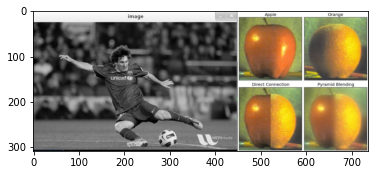

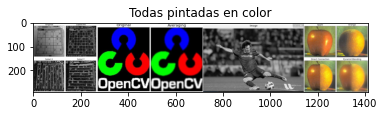

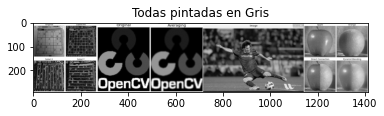

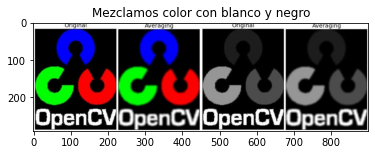

In [23]:
def pintaMI(v_img, title = ""):
    '''Dado un vector de imágenes los pinta concatenados.
    '''
    # Altura mínima de las imágenes
    altura_minima = min(img.shape[0] for img in v_img)

    numero_imagenes = len(v_img)
    # Añadimos un ínico title 
        
    for i in range(numero_imagenes):
        # Escalamos la altura a la más grande
        if v_img[i].shape[0] > altura_minima: 
            ancho_reescalado = int(v_img[i].shape[1]*altura_minima/v_img[i].shape[0])
            v_img[i] = cv2.resize(v_img[i], (ancho_reescalado, altura_minima),  interpolation=cv2.INTER_AREA)
    
        # pasamos a tribanda si está en monobanda
        if len(v_img[i].shape) != 3: 
            v_img[i] = cv2.cvtColor(v_img[i], cv2.COLOR_GRAY2RGB)
        
    img_v = cv2.hconcat(v_img)
    plt.clf()
    pintaI(img_v, title)

        
## Ejecución de ejemplo 
pintaMI ( [img_messi_color, img_orapple_color])
pintaMI(imagenes_color, 'Todas pintadas en color')
pintaMI(imagenes_gris, 'Todas pintadas en Gris')

# ¿Qué corre si mezclamos una en blanco y negro con otra en color?
pintaMI( [imagenes_color[1], imagenes_gris[1]], 'Mezclamos color con blanco y negro')
# Lo hace sin problema gracias a que lo transformamos a color

# Ejercicio 4
4. Escribir una función que modifique el color en la imagen de cada uno de
los elementos de una lista de coordenadas de píxeles 2 . En concreto, los
alumnos deben insertar un cuadrado azul de 100x100 pixeles en el centro
de la imagen a modificar.

## Descripción general del procedimiento

Dado que las imágenes no dejan de ser matrices, cambiaremos el color de las entradas pedidas. 
La función `CambiaPixeles` permite cambiar el color de píxeles de la lista de manera genérica. 
`InsertaCuadradoAzul` es la función que resuleve nuestro problema. 

Detalles que se han tenido en cuenta: 
1. El color se encuentra en BGR en vez de RGB y va de 0 a 255. 
2. Los ejes están girados 90º en sentido horario con centro en el origen con respecto al sistema de referencia usual en matemáticas. 

Por lo demás, las operaciones para calcular el centros son tan simples como dado un lado (ya sea altura o anchura), restarle los 100 píxeles del cuadrado azul y dividir entre dos. El píxel resultante y los 100 siguientes serán un lado del cuadrado.  




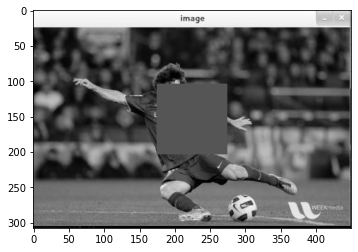

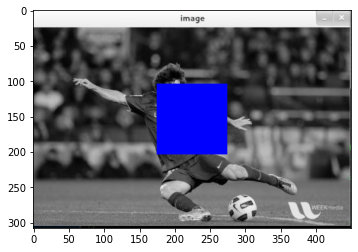

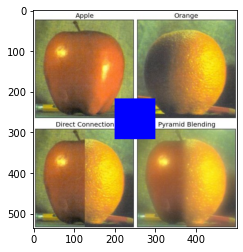

In [18]:
def CambiaPixeles ( imagen, pixeles, color):
  '''
    imagen: imagen a cambiar
    pixeles: lista de píxeles que se desean cambiar
    colores: lista de colores, el color i-ésimo se corresponde al del pixel i-ésimo de la lista de píxeles. 
  '''
  imagen_nueva = np.copy(imagen)
  
  # si la imagen es gris 
  if len(imagen_nueva.shape) != 3: 
    color = sum(color)//3
  # cambiamos píxeles 
  for (x,y) in pixeles: 
    imagen_nueva[(x,y)] = color
    
  return imagen_nueva


def InsertarCuadradoAzul (imagen): 
  '''Inserta en el centro de "imagen" un cuadrado de lado 100px pixéles
  '''
  tam_cuadrado = 100 # numero de pixeles de lado que tendrá el cuadrado
  # color azul en BGR
  color_azul = np.array([255,0,0]) 

  # cálculo de coordenadas de los píxeles teniendo en cuenta inversión (x,y de coordenadas)
  x_inicial = (imagen.shape[0]-tam_cuadrado)//2
  x_final = x_inicial + tam_cuadrado
  y_inicial = (imagen.shape [1]- tam_cuadrado)//2
  y_final = y_inicial + tam_cuadrado

  pixeles = [(x,y) for x in range(x_inicial, x_final) 
    for y in range(y_inicial, y_final)]
 
  imagenConCuadrado = CambiaPixeles(imagen, pixeles, color_azul)
  return imagenConCuadrado

## Ejecución del ejercicio con la foto de messi 
messiGrisCuadrado = InsertarCuadradoAzul(img_messi_gris)
messiColorCuadrado = InsertarCuadradoAzul(img_messi_color)
naranjaCuadrado = InsertarCuadradoAzul(img_orapple_color )
pintaI(messiGrisCuadrado)
pintaI(messiColorCuadrado)
pintaI(naranjaCuadrado)

# Ejercicio 5
5.Una función que sea capaz de representar varias imágenes con sus títulos en una misma ventana.

## Solución  

Puesto que no se especifica se han contemplado los siguientes casos: 
1. Las imágenes se quieren separadas. Para ello nos hemos basado en  [estos ejemplos](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)
2. Se ha contemplado la opción de que se quieran la imágenes concatenadas. esto se resuelve en la función multiplesImagenConcatenadasConTitulo(v_image, v_titulo )`.

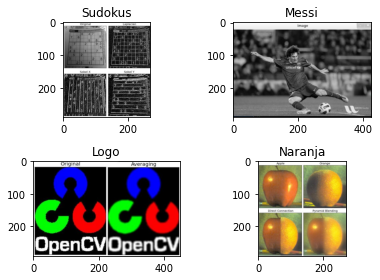

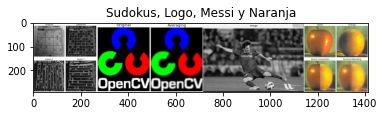

In [29]:
# Solución 1
def pintaConTitulos(v_img:list, titulos: list, columnas :int, filas:int ):
    '''Representa varias imágenes en una misma ventana
    Filas. 
    
    Suponemos:
        columnas * filas > len(v_img)
    '''
    # Gestionamos columanas y filas 
    numero_imagenes = len(v_img)
    # Preparamos grid
    fig, axs = plt.subplots(columnas, filas)
   
    for i in range(numero_imagenes):
        # pasamos a tribanda si está en monobanda
        if len(v_img[i].shape) != 3: 
            v_img[i] = cv2.cvtColor(v_img[i], cv2.COLOR_GRAY2RGB)
        # Calculamos posición en el grid
        x = i % columnas
        y = i // filas
        axs[x,y].imshow(v_img[i][:,:,::-1])
        
        # Añadimos título si lo tiene  
        if type(titulos)==list and len(titulos)>i:
            axs[x,y].set_title(titulos[i])
            
    fig.tight_layout() # Para que no se solapen los subtítulos
   
    plt.show()
    plt.clf()

    
# Solución 2
def multiplesImagenConcatenadasConTitulo(v_image, v_titulo ):
    '''Concatena las imágenes para luesgo mostrarlas con los títulos'''
    titulo = ', '.join(v_titulo[:-1]) + ' y ' + v_titulo[-1]
    return pintaMI(v_image, titulo)

pintaConTitulos(imagenes_color, ['Sudokus', 'Logo', 'Messi', 'Naranja'], 2,2)
multiplesImagenConcatenadasConTitulo(imagenes_color, ['Sudokus', 'Logo', 'Messi', 'Naranja'])